In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori


In [4]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [5]:
transactions = []

# Populate transactions list with 7501 rows and 20 columns
for i in range(0, 7501):
    transactions.append([str(data.values[i, j]) for j in range(0, 20) if pd.notna(data.values[i, j])])


In [6]:
rules = apriori(
    transactions=transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    min_length=2,
    max_length=2
)

results = list(rules)  # non-tabular output


In [7]:
def inspect(results):
    lhs = [tuple(result.ordered_statistics[0].items_base)[0] for result in results]
    rhs = [tuple(result.ordered_statistics[0].items_add)[0] for result in results]
    support = [result.support for result in results]
    confidence = [result.ordered_statistics[0].confidence for result in results]
    lift = [result.ordered_statistics[0].lift for result in results]
    
    return list(zip(lhs, rhs, support, confidence, lift))


In [8]:
output_df = pd.DataFrame(inspect(results), columns=['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

# Sort by Lift
output_df = output_df.sort_values(by='Lift', ascending=False)

# Show the top 10 rules
print(output_df.head(10))


         Left_Hand_Side Right_Hand_Side   Support  Confidence      Lift
3         fromage blanc           honey  0.003333    0.245098  5.164271
0           light cream         chicken  0.004533    0.290598  4.843951
2                 pasta        escalope  0.005866    0.372881  4.700812
8                 pasta          shrimp  0.005066    0.322034  4.506672
7     whole wheat pasta       olive oil  0.007999    0.271493  4.122410
5          tomato sauce     ground beef  0.005333    0.377358  3.840659
1  mushroom cream sauce        escalope  0.005733    0.300699  3.790833
4         herb & pepper     ground beef  0.015998    0.323450  3.291994
6           light cream       olive oil  0.003200    0.205128  3.114710


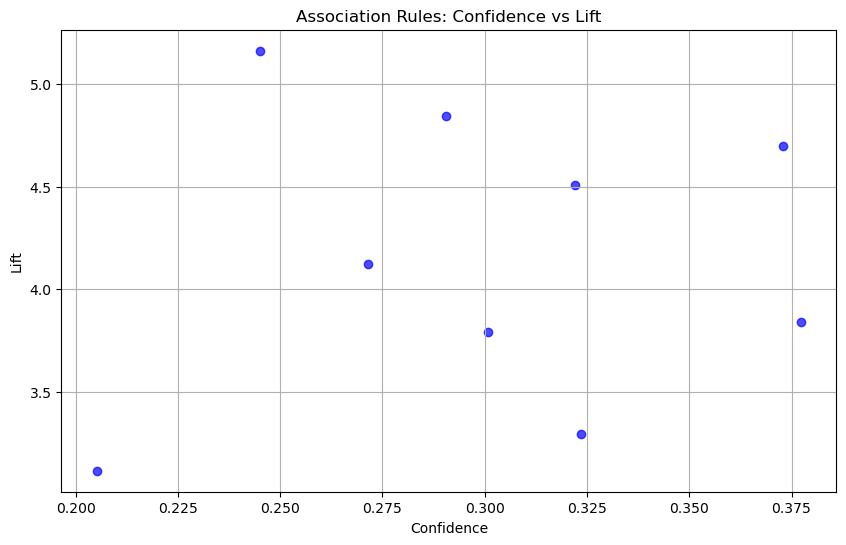

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(output_df['Confidence'], output_df['Lift'], alpha=0.7, color='blue')
plt.title('Association Rules: Confidence vs Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


In [11]:
# Import the required library
from scipy.stats import chi2_contingency

# Define the contingency table
data = [
    [207, 282, 241],
    [234, 242, 232]
]

# Perform chi-square test
stat, p, dof, expected = chi2_contingency(data)

# Output results
print("Chi-Square Statistic =", stat)
print("Degrees of Freedom =", dof)
print("Expected Frequencies:")
print(expected)
print("p-value =", p)

# Interpret the result
alpha = 0.05
if p <= alpha:
    print("Result: Dependent (reject H0)")
else:
    print("Result: Independent (H0 holds true)")


Chi-Square Statistic = 4.542228269825232
Degrees of Freedom = 2
Expected Frequencies:
[[223.87343533 266.00834492 240.11821975]
 [217.12656467 257.99165508 232.88178025]]
p-value = 0.1031971404730939
Result: Independent (H0 holds true)
